In [0]:
#Import Tools
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random
import matplotlib.pyplot as plt

#set random seed for reproduction's sake
np.random.seed(49)

In [0]:
#fetching the data from S&P 500 webpage
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [0]:
#getting the first element came from webscraping which is the tabular data
table = data[0]

#Getting the column names 
header = table.iloc[0]

#Now arranged the whole dataset with their proper names and values
corrected_table = table[0:]
corrected_table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,reports,Industrials,Industrial Machinery,"White Plains, New York",2011-11-01,1524472,NaN
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [0]:
corrected_table.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [0]:
dtf = corrected_table['GICS Sector']
typ = dtf[1]

In [0]:
pf = dtf.value_counts()
pf

Industrials               70
Information Technology    69
Financials                67
Consumer Discretionary    64
Health Care               60
Consumer Staples          33
Real Estate               32
Energy                    28
Materials                 28
Utilities                 28
Communication Services    26
Name: GICS Sector, dtype: int64

In [0]:
#Getting the tickers which will help to fetch data from yahoo finance
tickers = corrected_table['Symbol'].tolist()
print (tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CV

In [0]:
#Selecting randomly 5 tickers
selected = random.sample(tickers, 15)
selected

['IFF',
 'PG',
 'AXP',
 'USB',
 'TAP',
 'COO',
 'FRC',
 'PFE',
 'DTE',
 'UA',
 'PSX',
 'ARNC',
 'APD',
 'RSG',
 'IPGP']

In [0]:
# pull Adjusted closing prices with Pandas datareader and check the head of this data

table = pd.DataFrame()
count = 0

for item in selected:
    try:
        table[item] = web.DataReader(item, data_source='yahoo', start='2016-1-1' , end = '2018-12-31')['Adj Close']
    except:
        print(count,'th indexed data not available')
    
    count += 1

In [0]:
table.head()

,IFF,PG,AXP,USB,TAP,COO,FRC,PFE,DTE,UA,PSX,ARNC,APD,RSG,IPGP
Date,,,,,,,,,,,,,,,
2016-01-04,109.356476,69.128365,63.385506,37.671577,83.821861,131.708710,52.276104,27.574940,68.537849,79.660004,70.412338,20.959036,107.323959,39.861385,85.839996
2016-01-05,110.190353,69.348877,62.410213,37.853214,84.139748,131.429031,52.707142,27.773451,69.239349,80.150002,71.221275,20.009296,105.404930,40.508186,83.389999
2016-01-06,108.559692,68.678505,60.677113,37.281055,82.468590,131.439011,52.251705,27.281502,68.927574,79.870003,68.609825,18.584681,102.837936,40.646786,80.930000
2016-01-07,108.022308,68.078690,60.130814,36.572670,82.059860,127.813187,51.462849,27.100258,68.174126,78.000000,67.220573,17.850794,99.390350,40.794628,78.099998
2016-01-08,107.790672,67.011368,59.933014,36.055008,81.033562,128.562332,50.641460,26.755030,67.879662,75.000000,66.130287,17.419098,98.875305,40.776146,79.800003


In [0]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [0]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 1000000



In [0]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

Text(0.5, 1.0, 'Efficient Frontier')

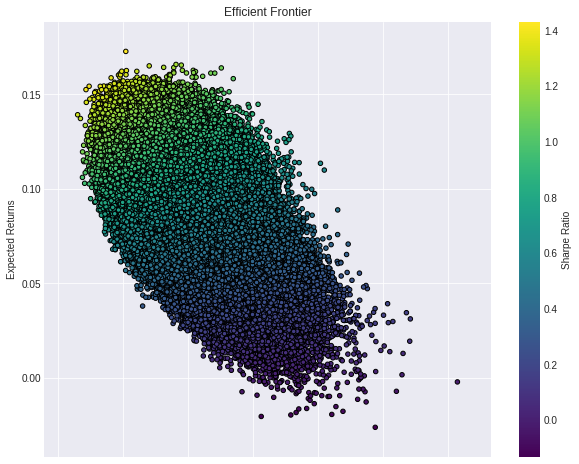

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

In [0]:
df.head(15)

,Returns,Volatility,Sharpe Ratio,IFF Weight,PG Weight,AXP Weight,USB Weight,TAP Weight,COO Weight,FRC Weight,PFE Weight,DTE Weight,UA Weight,PSX Weight,ARNC Weight,APD Weight,RSG Weight,IPGP Weight
0,0.074958,0.142726,0.525187,0.032191,0.026425,0.099080,0.095365,0.073082,0.060633,0.058503,0.022507,0.082332,0.095860,0.077187,0.053349,0.047298,0.085827,0.090362
1,0.096897,0.133799,0.724197,0.032162,0.135049,0.008270,0.040681,0.043815,0.098519,0.099319,0.132363,0.085111,0.049859,0.059063,0.127236,0.035361,0.042518,0.010674
2,0.096264,0.124369,0.774017,0.026822,0.097119,0.089974,0.067957,0.105595,0.100242,0.091179,0.098240,0.071003,0.041919,0.062153,0.040251,0.051229,0.038547,0.017769
3,0.125138,0.147338,0.849325,0.126586,0.076814,0.116452,0.080318,0.000944,0.088803,0.108717,0.045244,0.003884,0.012841,0.036184,0.087297,0.117573,0.001438,0.096905
4,0.091955,0.129943,0.707654,0.015061,0.102039,0.068319,0.108740,0.029815,0.065302,0.057440,0.080687,0.068974,0.066003,0.106572,0.067005,0.073148,0.083668,0.007228
5,0.125322,0.129777,0.965671,0.111004,0.090196,0.114103,0.067242,0.000672,0.101989,0.071815,0.117323,0.016297,0.031910,0.094064,0.009122,0.084451,0.032231,0.057585
6,0.084895,0.141045,0.601899,0.059469,0.110146,0.064846,0.104752,0.077574,0.057251,0.070862,0.001299,0.044515,0.041982,0.081416,0.094628,0.044744,0.044761,0.101754
7,0.069313,0.143714,0.482296,0.104010,0.096301,0.043144,0.106401,0.069265,0.115762,0.052713,0.051412,0.037496,0.099199,0.007196,0.070199,0.042544,0.039454,0.064903
8,0.106975,0.137198,0.779709,0.054656,0.024172,0.025054,0.124042,0.098247,0.084945,0.109994,0.108252,0.084113,0.017428,0.008519,0.076419,0.044051,0.023418,0.116690
9,0.115716,0.137665,0.840557,0.070493,0.022072,0.103691,0.050026,0.004163,0.150126,0.087825,0.055815,0.039602,0.080309,0.090033,0.016264,0.095557,0.099388,0.034637


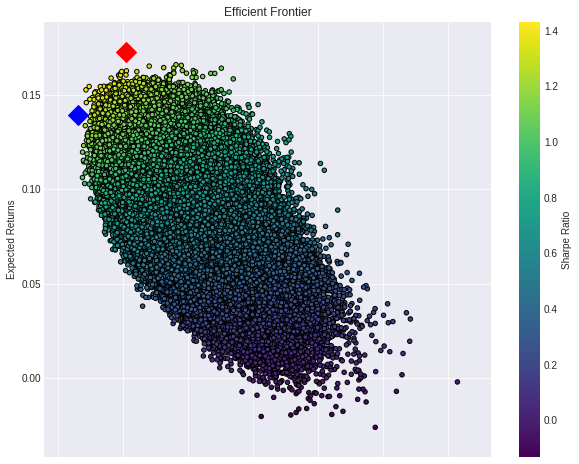

In [0]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
median_sharpe = df['Sharpe Ratio'].median()
median_volatility = df['Volatility'].median()


# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
median_sharpe_port = df.loc[df['Sharpe Ratio'].between(median_sharpe, median_sharpe+0.00001, inclusive=False)]
                                                                    


median_vol_port = df.loc[df['Volatility'].between(median_volatility, median_volatility+0.00001, inclusive=False)]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)

plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,IFF Weight,PG Weight,AXP Weight,USB Weight,TAP Weight,COO Weight,FRC Weight,PFE Weight,DTE Weight,UA Weight,PSX Weight,ARNC Weight,APD Weight,RSG Weight,IPGP Weight
299585,0.172736,0.12076,1.430407,0.013106,0.064691,0.043372,0.006938,0.010077,0.178851,0.169054,0.175454,0.074318,0.007442,0.023599,0.003855,0.030981,0.175937,0.022325


In [0]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                507176
Returns       0.139233
Volatility    0.105948
Sharpe Ratio  1.314171
IFF Weight    0.026926
PG Weight     0.177293
AXP Weight    0.091025
USB Weight    0.042932
TAP Weight    0.035924
COO Weight    0.052504
FRC Weight    0.071488
PFE Weight    0.089897
DTE Weight    0.181616
UA Weight     0.000698
PSX Weight    0.029137
ARNC Weight   0.025939
APD Weight    0.010357
RSG Weight    0.163451
IPGP Weight   0.000815
                299585
Returns       0.172736
Volatility    0.120760
Sharpe Ratio  1.430407
IFF Weight    0.013106
PG Weight     0.064691
AXP Weight    0.043372
USB Weight    0.006938
TAP Weight    0.010077
COO Weight    0.178851
FRC Weight    0.169054
PFE Weight    0.175454
DTE Weight    0.074318
UA Weight     0.007442
PSX Weight    0.023599
ARNC Weight   0.003855
APD Weight    0.030981
RSG Weight    0.175937
IPGP Weight   0.022325
